In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import of cleaned DataFrame (Sacre)¶

In [2]:
#dfc = DataFrame cleaned !
dfc = pd.read_csv('../raw_data/clean_data.csv', low_memory = False)

In [4]:
#dfc.name.value_counts()

In [5]:
dfc.rename(str.strip, axis='columns', inplace = True)

In [6]:
dfc.columns

Index(['name', 'club', 'nat', 'position', 'dob', 'age', 'height', 'weight',
       'wage', 'last trans. fee', 'value', 'agg', 'jum', 'pun', 'vis', 'l th',
       'lon', 'otb', 'tck', 'tec', 'tea', 'cmp', 'fre', 'ref', 'pos', 'pen',
       'pas', 'fla', 'ant', 'cro', 'mar', 'ldr', 'cor', 'cnt', 'det', 'dec',
       'hea', 'fir', 'com', 'acc', 'pac', 'aer', 'str', 'thr', 'han', 'ecc',
       'dri', 'bal', 'kic', 'sta', 'agi', 'wor', 'bra', 'cmd', 'fin', '1v1',
       'tro', 'centerback', 'fullback', 'goalkeeper', 'midfielder', 'striker',
       'winger', 'division_rating', 'nat_rating', 'club_rating', 'either_left',
       'either_right', 'left', 'right'],
      dtype='object')

In [7]:
dfc.head(3)

,name,club,nat,position,dob,age,height,weight,wage,last trans. fee,...,midfielder,striker,winger,division_rating,nat_rating,club_rating,either_left,either_right,left,right
0,Kevin De Bruyne,Man City,BEL,"M (RLC), AM (C)",28/6/1991 (29 years old),29.0,181.0,68.0,1091000.0,60000000.0,...,1,0,0,93.8,1793.71,2013.0,0,1,0,0
1,Harry Kane,Tottenham,ENG,"AM (C), ST (C)",28/7/1993 (27 years old),26.0,188.0,86.0,948000.0,0.0,...,0,1,0,93.8,1807.88,1837.0,1,0,0,0
2,Mohamed Salah,Liverpool,EGY,"AM (RL), ST (C)",15/6/1992 (28 years old),28.0,175.0,72.0,948000.0,37500000.0,...,0,0,1,93.8,1511.95,2042.0,0,0,1,0


In [15]:
df = dfc.copy()

In [16]:
df.columns

Index(['name', 'club', 'nat', 'position', 'dob', 'age', 'height', 'weight',
       'wage', 'last trans. fee', 'value', 'agg', 'jum', 'pun', 'vis', 'l th',
       'lon', 'otb', 'tck', 'tec', 'tea', 'cmp', 'fre', 'ref', 'pos', 'pen',
       'pas', 'fla', 'ant', 'cro', 'mar', 'ldr', 'cor', 'cnt', 'det', 'dec',
       'hea', 'fir', 'com', 'acc', 'pac', 'aer', 'str', 'thr', 'han', 'ecc',
       'dri', 'bal', 'kic', 'sta', 'agi', 'wor', 'bra', 'cmd', 'fin', '1v1',
       'tro', 'centerback', 'fullback', 'goalkeeper', 'midfielder', 'striker',
       'winger', 'division_rating', 'nat_rating', 'club_rating', 'either_left',
       'either_right', 'left', 'right'],
      dtype='object')

# New dataframe with only numerical features 

In [17]:
# Create a new dataset with the numerical features for the followings steps.
columns_to_remove = ['club', 'nat', 'position', 'dob', 'age', 'height', 'weight',
       'wage', 'last trans. fee', 'value', 'centerback', 'fullback', 'goalkeeper', 'midfielder', 'striker',
       'winger', 'division_rating', 'nat_rating', 'club_rating', 'either_left',
       'either_right', 'left', 'right']

In [18]:
# Remove specified columns
df.drop(columns=columns_to_remove, inplace=True)

In [21]:
# Grouping and creating new features by calculating the mean of each group

# Offensive Skills
df['shooting'] = df[['fin', 'lon', 'fre', 'pen']].mean(axis=1)
df['dribbling_control'] = df[['dri', 'fir', 'fla', 'tec']].mean(axis=1)
df['passing_vision'] = df[['pas', 'vis', 'l th', 'cro', 'cor', 'otb']].mean(axis=1)

# Defensive Skills
df['tackling_interception'] = df[['tck', 'mar', 'pos', 'ant']].mean(axis=1)
df['aerial_defense'] = df[['hea', 'jum', 'aer']].mean(axis=1)

# Physical Attributes
df['speed_agility'] = df[['acc', 'pac', 'agi']].mean(axis=1)
df['strength_stamina'] = df[['str', 'sta', 'bal']].mean(axis=1)

# Mental and Tactical Attributes
df['decision_making'] = df[['dec', 'cmp']].mean(axis=1)
df['work_ethic_effort'] = df[['wor', 'det', 'bra']].mean(axis=1)

# Leadership and Teamwork
df['leadership'] = df[['ldr', 'com']].mean(axis=1)
df['teamwork'] = df['tea']

# Goalkeeping Abilities
df['goalkeeping_abilities'] = df[['han', 'ref', 'kic', 'thr', '1v1', 'ecc', 'cmd']].mean(axis=1)

# Behavioral Attributes
df['behavioral_attributes'] = df[['agg', 'pun']].mean(axis=1)


# Player Traits
df['player_traits'] = df['tro']

#'dfgf' is the new DataFrame = DataFrame grouped features
dfgf = df[['name','shooting', 'dribbling_control', 'passing_vision', 'tackling_interception', 'aerial_defense', 'speed_agility', 'strength_stamina', 'decision_making', 'work_ethic_effort', 'leadership', 'teamwork', 'goalkeeping_abilities', 'behavioral_attributes', 'player_traits']]

In [23]:
dfgf_no_name = dfgf.iloc[:,1:]

# Custom_scaler

In [24]:
dfgf_no_name.sum(axis=1)

0         155.214286
1         166.404762
2         151.892857
3         152.226190
4         142.250000
             ...    
174319    100.130952
174320     86.261905
174321    101.297619
174322     99.892857
174323     90.357143
Length: 174324, dtype: float64

In [25]:
def custom_scaler(dfgf_no_name):
    total_score = dfgf_no_name.sum(axis=1)

    scaled_dfgf_no_name = dfgf_no_name.div(total_score, axis=0)

    return scaled_dfgf_no_name

In [26]:
scaled_df = custom_scaler(dfgf_no_name)
scaled_df

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,teamwork,goalkeeping_abilities,behavioral_attributes,player_traits
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,0.090198,0.011045,0.041878,0.019328
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,0.108170,0.015453,0.039061,0.018028
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,0.092170,0.014108,0.039502,0.013167
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,0.098538,0.014077,0.042700,0.026277
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,0.105448,0.014060,0.035149,0.007030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174319,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,0.099869,0.017120,0.079895,0.029961
174320,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,0.092741,0.028153,0.098537,0.034778
174321,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,0.128335,0.016923,0.074039,0.009872
174322,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,0.160172,0.021452,0.080086,0.010011


In [27]:
scaled_df.iloc[0].sum()

0.9999999999999999

In [29]:
# Adding the player Names to the DataFrame scaled_df + The total score min-max scaled 
scaled_df_name = scaled_df.copy()
scaled_df_name['name'] = dfgf['name']
scaled_df_name.drop(columns = 'goalkeeping_abilities', inplace = True)

# Player's scoring

In [37]:
# Adding the total score min-max scaled to the DataFrame
# Scale the total score (reshape is required as MinMaxScaler expects 2D input)
from sklearn.preprocessing import MinMaxScaler

def custom_scaler(dfgf_no_name):
    total_score = dfgf_no_name.sum(axis=1)
    return total_score

total_score = custom_scaler(dfgf_no_name)

scaler = MinMaxScaler()

scaled_total_score = scaler.fit_transform(total_score.values.reshape(-1, 1)).flatten()

scaled_df['scaled_total_score'] = scaled_total_score


scaled_df

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,teamwork,goalkeeping_abilities,behavioral_attributes,player_traits,scaled_total_score
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,0.090198,0.011045,0.041878,0.019328,0.823356
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,0.108170,0.015453,0.039061,0.018028,0.907472
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,0.092170,0.014108,0.039502,0.013167,0.798389
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,0.098538,0.014077,0.042700,0.026277,0.800895
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,0.105448,0.014060,0.035149,0.007030,0.725906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174319,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,0.099869,0.017120,0.079895,0.029961,0.409306
174320,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,0.092741,0.028153,0.098537,0.034778,0.305056
174321,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,0.128335,0.016923,0.074039,0.009872,0.418076
174322,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,0.160172,0.021452,0.080086,0.010011,0.407517


In [42]:
#scaled_df_label_score = scaled_df_label_score.rename(columns={'Name': 'name'})
scaled_df['name'] = dfgf['name']

In [43]:
scaled_df

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,teamwork,goalkeeping_abilities,behavioral_attributes,player_traits,scaled_total_score,name
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,0.090198,0.011045,0.041878,0.019328,0.823356,Kevin De Bruyne
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,0.108170,0.015453,0.039061,0.018028,0.907472,Harry Kane
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,0.092170,0.014108,0.039502,0.013167,0.798389,Mohamed Salah
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,0.098538,0.014077,0.042700,0.026277,0.800895,Sadio Mané
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,0.105448,0.014060,0.035149,0.007030,0.725906,Son Heung-Min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174319,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,0.099869,0.017120,0.079895,0.029961,0.409306,Nick Brown
174320,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,0.092741,0.028153,0.098537,0.034778,0.305056,Luis Alcalá
174321,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,0.128335,0.016923,0.074039,0.009872,0.418076,Devin Lee
174322,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,0.160172,0.021452,0.080086,0.010011,0.407517,Yeferson Suárez


# df with positions and foots

In [38]:
dfpf = dfc.copy()

In [39]:

# Create a new dataset with the numerical features for the followings steps.

columns_to_remove = ['nat', 'position', 'dob', 'age', 'height', 'weight',
       'wage', 'last trans. fee', 'value', 'agg', 'jum', 'pun', 'vis', 'l th',
       'lon', 'otb', 'tck', 'tec', 'tea', 'cmp', 'fre', 'ref', 'pos', 'pen',
       'pas', 'fla', 'ant', 'cro', 'mar', 'ldr', 'cor', 'cnt', 'det', 'dec',
       'hea', 'fir', 'com', 'acc', 'pac', 'aer', 'str', 'thr', 'han', 'ecc',
       'dri', 'bal', 'kic', 'sta', 'agi', 'wor', 'bra', 'cmd', 'fin', '1v1',
       'tro', 'division_rating', 'nat_rating', 'club_rating']

# Remove specified columns
dfpf.drop(columns=columns_to_remove, inplace=True)

In [40]:
dfpf.head()

,name,club,centerback,fullback,goalkeeper,midfielder,striker,winger,either_left,either_right,left,right
0,Kevin De Bruyne,Man City,0,0,0,1,0,0,0,1,0,0
1,Harry Kane,Tottenham,0,0,0,0,1,0,1,0,0,0
2,Mohamed Salah,Liverpool,0,0,0,0,0,1,0,0,1,0
3,Sadio Mané,Liverpool,0,0,0,0,0,1,0,0,0,1
4,Son Heung-Min,Tottenham,0,0,0,0,0,1,1,0,0,0


In [41]:
dfgf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174324 entries, 0 to 174323
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   name                   174324 non-null  object 
 1   shooting               174324 non-null  float64
 2   dribbling_control      174324 non-null  float64
 3   passing_vision         174324 non-null  float64
 4   tackling_interception  174324 non-null  float64
 5   aerial_defense         174324 non-null  float64
 6   speed_agility          174324 non-null  float64
 7   strength_stamina       174324 non-null  float64
 8   decision_making        174324 non-null  float64
 9   work_ethic_effort      174324 non-null  float64
 10  leadership             174324 non-null  float64
 11  teamwork               174324 non-null  float64
 12  goalkeeping_abilities  174324 non-null  float64
 13  behavioral_attributes  174324 non-null  float64
 14  player_traits          174324 non-nu

# Global df = scaled_df (grouped scaled features)+ dfpf (position & foots)

In [46]:
dfpf.drop(columns=['name', 'club'])

,centerback,fullback,goalkeeper,midfielder,striker,winger,either_left,either_right,left,right
0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
174319,0,0,0,0,1,0,0,0,0,1
174320,0,0,0,0,1,0,0,0,0,1
174321,1,0,0,0,0,0,0,0,0,1
174322,0,0,0,1,0,0,0,0,0,1


In [47]:
#scaled_df

In [48]:
scaled_df['centerback'] = dfpf['centerback']
scaled_df['fullback'] = dfpf['fullback']
scaled_df['goalkeeper'] = dfpf['goalkeeper']
scaled_df['midfielder'] = dfpf['midfielder']
scaled_df['striker'] = dfpf['striker']
scaled_df['winger'] = dfpf['winger']
scaled_df['either_left'] = dfpf['either_left']
scaled_df['either_right'] = dfpf['either_right']
scaled_df['left'] = dfpf['left']
scaled_df['right'] = dfpf['right']

In [50]:
#scaled_df.info()

In [51]:
scaled_df.columns

Index(['shooting', 'dribbling_control', 'passing_vision',
       'tackling_interception', 'aerial_defense', 'speed_agility',
       'strength_stamina', 'decision_making', 'work_ethic_effort',
       'leadership', 'teamwork', 'goalkeeping_abilities',
       'behavioral_attributes', 'player_traits', 'scaled_total_score', 'name',
       'centerback', 'fullback', 'goalkeeper', 'midfielder', 'striker',
       'winger', 'either_left', 'either_right', 'left', 'right'],
      dtype='object')

# kmeans with player foots and positions

In [77]:
scaled_df_kmeans = scaled_df.copy()

In [78]:
scaled_df_kmeans.rename(str.strip, axis='columns', inplace = True)

In [79]:
scaled_df_kmeans = scaled_df_kmeans[scaled_df_kmeans.goalkeeper != 1]

In [80]:
scaled_df_kmeans.drop(columns=['name', 'goalkeeper', 'goalkeeping_abilities'], inplace=True)

In [81]:
scaled_df_kmeans.columns

Index(['shooting', 'dribbling_control', 'passing_vision',
       'tackling_interception', 'aerial_defense', 'speed_agility',
       'strength_stamina', 'decision_making', 'work_ethic_effort',
       'leadership', 'teamwork', 'behavioral_attributes', 'player_traits',
       'scaled_total_score', 'centerback', 'fullback', 'midfielder', 'striker',
       'winger', 'either_left', 'either_right', 'left', 'right'],
      dtype='object')

In [82]:
km = KMeans(n_clusters=12)
km.fit(scaled_df_kmeans)

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=12)

In [84]:
scaled_df_kmeans['name'] = scaled_df['name']
scaled_df_kmeans['label'] = km.labels_
scaled_df_kmeans[['name', 'label']].head(5)

,name,label
0,Kevin De Bruyne,10
1,Harry Kane,8
2,Mohamed Salah,6
3,Sadio Mané,3
4,Son Heung-Min,6


In [96]:
scaled_df_kmeans[scaled_df_kmeans['label']==10].sort_values(by='scaled_total_score', ascending=False)[['name', 'label']].head(50)

,name,label
0,Kevin De Bruyne,10
68548,Toni Kroos,10
143053,Marek Hamsik,10
68641,Lorenzo Pellegrini,10
69058,Luca Sangalli,10
68535,Eden Hazard,10
68857,Téji Savanier,10
68635,Piotr Zieliński,10
68944,Stanislav Lobotka,10
69510,Artur Ionita,10


In [97]:
scaled_df_kmeans[scaled_df_kmeans['name']=='Marc-André ter Stegen']

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,...,fullback,midfielder,striker,winger,either_left,either_right,left,right,name,label


In [100]:
scaled_df_kmeans.columns

Index(['shooting', 'dribbling_control', 'passing_vision',
       'tackling_interception', 'aerial_defense', 'speed_agility',
       'strength_stamina', 'decision_making', 'work_ethic_effort',
       'leadership', 'teamwork', 'behavioral_attributes', 'player_traits',
       'scaled_total_score', 'centerback', 'fullback', 'midfielder', 'striker',
       'winger', 'either_left', 'either_right', 'left', 'right', 'label'],
      dtype='object')

# Elbow method 

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs

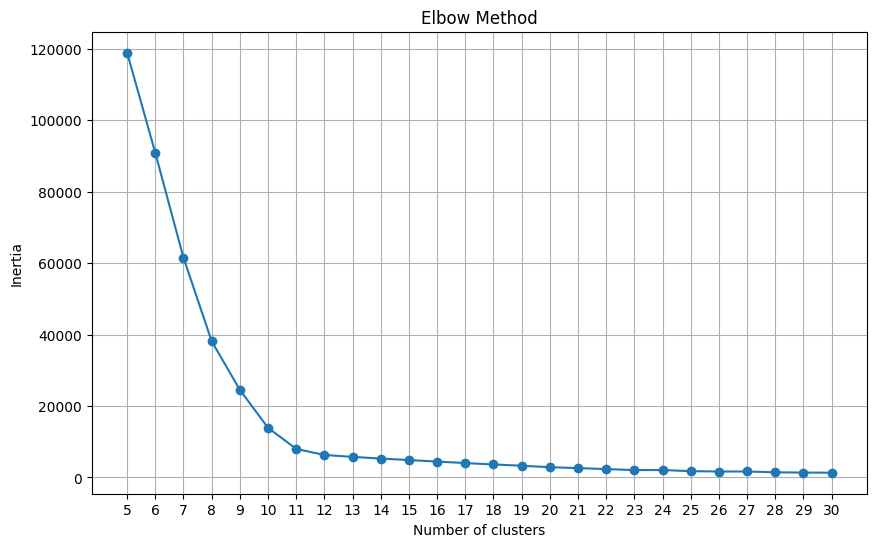

In [101]:
#scaled_df_kmeans = scaled_df_kmeans.drop(columns=['name'])
# Initialize an empty list to store the inertia values
inertia_values = []

# Range of cluster numbers to try (from 5 to 30)
cluster_range = range(5, 31)

# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df_kmeans) #IMPORTANT df with LABEL + SCORE 
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# KNN on scaled_df_kmeans

In [102]:
scaled_df_kmeans['name'] = scaled_df['name']

In [105]:
#scaled_df_kmeans.columns

In [110]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

def find_closest_players(player_name, num_neighbors, data, feature_columns):
    """
    Find the closest players based on the KNN model for a given player.

    Parameters:
    player_name (str): The name of the player to find neighbors for.
    num_neighbors (int): The number of closest neighbors to find.
    data (pd.DataFrame): The DataFrame containing player data.
    feature_columns (list): List of columns to use as features in KNN.

    Returns:
    list: A list of closest player names.
    """
    if player_name not in data['name'].values:
        return f"Player '{player_name}' not found in the dataset."
    
    # Extract the specified player's statistics
    player_stats = data[data['name'] == player_name][feature_columns].to_numpy()

    # Fit the NearestNeighbors model
    nbrs = NearestNeighbors(n_neighbors=num_neighbors + 1).fit(data[feature_columns])

    # Find the nearest neighbors
    distances, indices = nbrs.kneighbors(player_stats)

    # Get the names of similar players
    # Exclude the first one if it's the player themselves
    similar_players_indices = indices.flatten()
    if similar_players_indices[0] == data[data['name'] == player_name].index[0]:
        similar_players_indices = similar_players_indices[1:]
    else:
        similar_players_indices = similar_players_indices[:-1]
    
    similar_players = data.iloc[similar_players_indices].sort_values(by='scaled_total_score',ascending=False)[['name', 'scaled_total_score']]
  #by='scaled_total_score' bPREVIOUS SORTING  
    return similar_players

# Example usage
# Assuming 'merged_df_kmeans_NOGK' is your DataFrame and it's already scaled
# Replace 'player_name' with the name of the player you're interested in
# Replace 'num_neighbors' with the number of neighbors you want to find
# 'feature_columns' should be the list of columns used as features in KNN
player_name = 'Neymar'
num_neighbors = 10
feature_columns = scaled_df_kmeans.columns.drop('name')  # Adjust as needed

closest_players = find_closest_players(player_name, num_neighbors, scaled_df_kmeans, feature_columns)
print("Closest Players:", closest_players[1:])

Closest Players:                     name  scaled_total_score
68532             Neymar            0.736823
71259      Franck Ribéry            0.732528
20       Marcus Rashford            0.722416
68564         Marco Reus            0.716689
143037    Jonathan Viera            0.711141
143082              Dudu            0.708993
68533      Kylian Mbappé            0.704519
68574    Lorenzo Insigne            0.691454
68610   Yannick Carrasco            0.672215


/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [108]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

def find_closest_players(player_name, num_neighbors, data, feature_columns):
    """
    Find the closest players based on the KNN model for a given player and sort 
    them by the feature where the input player has the highest score.

    Parameters:
    player_name (str): The name of the player to find neighbors for.
    num_neighbors (int): The number of closest neighbors to find.
    data (pd.DataFrame): The DataFrame containing player data.
    feature_columns (list): List of columns to use as features in KNN.

    Returns:
    pd.DataFrame: A DataFrame of closest player names sorted by the best scoring feature.
    """
    if player_name not in data['name'].values:
        return f"Player '{player_name}' not found in the dataset."
    
    # Extract the specified player's statistics
    player_stats = data[data['name'] == player_name][feature_columns]

    # Identify the feature with the best score for the input player
    best_feature = player_stats.idxmax(axis=1).values[0]

    # Fit the NearestNeighbors model
    nbrs = NearestNeighbors(n_neighbors=num_neighbors + 1).fit(data[feature_columns])

    # Find the nearest neighbors
    distances, indices = nbrs.kneighbors(player_stats)

    # Get the names of similar players
    # Exclude the first one if it's the player themselves
    similar_players_indices = indices.flatten()
    if similar_players_indices[0] == data[data['name'] == player_name].index[0]:
        similar_players_indices = similar_players_indices[1:]
    else:
        similar_players_indices = similar_players_indices[:-1]
    
    similar_players = data.iloc[similar_players_indices]

    # Sort the similar players by the best feature
    sorted_similar_players = similar_players.sort_values(by=best_feature, ascending=False)[['name'] + [best_feature]]

    return sorted_similar_players

# Example usage
player_name = 'Neymar'
num_neighbors = 10
feature_columns = scaled_df_kmeans.columns.drop('name')  # Adjust as needed

closest_players = find_closest_players(player_name, num_neighbors, scaled_df_kmeans, feature_columns)
print("Closest Players Sorted by Best Feature:", closest_players)

Closest Players Sorted by Best Feature:                     name  label
68532             Neymar      3
68533      Kylian Mbappé      3
143037    Jonathan Viera      3
68564         Marco Reus      3
71259      Franck Ribéry      3
20       Marcus Rashford      3
68574    Lorenzo Insigne      3
68837     Alexis Sánchez      3
143082              Dudu      3
68610   Yannick Carrasco      3


In [163]:
#scaled_df_kmeans.columns

In [164]:
#scaled_df_kmeans['name'] = scaled_df['name']

# Plotting features of the closest players 

In [135]:
def find_closest_players(player_name, num_neighbors, data, feature_columns):
    if player_name not in data['name'].values:
        return f"Player '{player_name}' not found in the dataset."

    # Extract the specified player's statistics
    player_stats = data[data['name'] == player_name][feature_columns].to_numpy()

    # Fit the NearestNeighbors model
    nbrs = NearestNeighbors(n_neighbors=num_neighbors + 1).fit(data[feature_columns])

    # Find the nearest neighbors
    distances, indices = nbrs.kneighbors(player_stats)
    import ipdb;ipdb.set_trace()
    # Get the names of similar players
    similar_players_indices = indices.flatten()
    if similar_players_indices[0] == data[data['name'] == player_name].index[0]:
        similar_players_indices = similar_players_indices[1:]
    else:
        similar_players_indices = similar_players_indices[:-1]

    # Extract similar players data
    similar_players = data.iloc[similar_players_indices][feature_columns]

    # Find the best feature for each player
    similar_players['best_feature'] = similar_players[feature_columns].idxmax(axis=1)
    similar_players['best_score'] = similar_players.apply(lambda row: row[row['best_feature']], axis=1)

    # Sort by best score
    similar_players = similar_players.sort_values(by='best_score', ascending=False)

    return similar_players#[['name', 'best_feature', 'best_score']]

# Example usage
player_name = 'Neymar'
num_neighbors = 10
feature_columns = scaled_df_kmeans.columns.drop('name')  # Adjust as needed

closest_players = find_closest_players(player_name, num_neighbors, scaled_df_kmeans, feature_columns)
print("Closest Players:", closest_players[1:])


/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


> /var/folders/8b/dtnxr1xx259b5f5fqdlh_w340000gn/T/ipykernel_2323/4155022442.py(18)find_closest_players()
     17     # Get the names of similar players
---> 18     similar_players_indices = indices.flatten()
     19     if similar_players_indices[0] == data[data['name'] == player_name].index[0]:

ipdb> c
Closest Players:         shooting  dribbling_control  passing_vision  tackling_interception  \
68533   0.096840           0.123740        0.081298               0.041247   
143037  0.108707           0.114053        0.098608               0.051680   
68564   0.108138           0.104592        0.093365               0.070910   
71259   0.094319           0.129252        0.087333               0.050653   
20      0.096977           0.109320        0.067003               0.037028   
68574   0.103511           0.123487        0.096852               0.056295   
68837   0.087586           0.109912        0.085868               0.056673   
143082  0.080357           0.107143        0.098810 

In [159]:
'''subset = closest_players.select_dtypes(include='float64').drop(columns='scaled_total_score').iloc[0:2].reset_index()

subset'''

,index,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,teamwork,behavioral_attributes,player_traits
0,68532,0.113081,0.135697,0.097424,0.034794,0.037114,0.118300,0.085826,0.111341,0.090465,0.052191,0.055671,0.045232,0.006959
1,68533,0.096840,0.123740,0.081298,0.041247,0.038258,0.133903,0.093254,0.114774,0.086080,0.046627,0.071734,0.032280,0.021520


<BarContainer object of 14 artists>

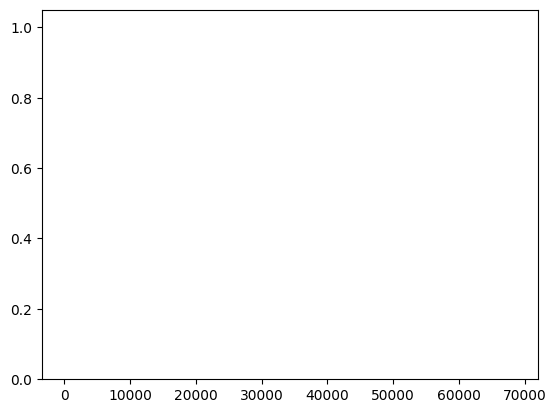

In [162]:
'''import seaborn as sns
import matplotlib.pyplot as plt

plt.bar(subset.iloc[0], height=1)

#sns.barplot(data=subset, hue='index')'''

In [165]:
#scaled_df_kmeans

In [174]:
import plotly.graph_objects as go
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def find_closest_players(player_name, num_neighbors, data, feature_columns):
    if player_name not in data['name'].values:
        return f"Player '{player_name}' not found in the dataset."
    
    # Extract the specified player's statistics
    player_stats = data[data['name'] == player_name][feature_columns].to_numpy()
    
    # Fit the NearestNeighbors model
    nbrs = NearestNeighbors(n_neighbors=num_neighbors + 1).fit(data[feature_columns])
    
    # Find the nearest neighbors
    distances, indices = nbrs.kneighbors(player_stats)
    
    # Get the names of similar players
    similar_players_indices = indices.flatten()
    if similar_players_indices[0] == data[data['name'] == player_name].index[0]:
        similar_players_indices = similar_players_indices[1:]
    else:
        similar_players_indices = similar_players_indices[:-1]
    
    # Extract similar players data
    return data.iloc[similar_players_indices]

# Define the player name
player_name = 'Neymar'
num_neighbors = 7

# Use all columns except 'name' for finding neighbors
all_feature_columns = scaled_df_kmeans.columns.drop('name')

# Define the subset of features for the radar chart
radar_features = ['shooting', 'dribbling_control', 'passing_vision',
                  'tackling_interception', 'aerial_defense', 'speed_agility',
                  'strength_stamina', 'decision_making', 'work_ethic_effort',
                  'leadership', 'teamwork', 'behavioral_attributes', 'player_traits']

# Get closest players
closest_players = find_closest_players(player_name, num_neighbors, scaled_df_kmeans, all_feature_columns)

# Player's own stats for radar features
player_stats = scaled_df_kmeans[scaled_df_kmeans['name'] == player_name][radar_features].iloc[0]

# Create and display radar charts, skipping the first player
for i, (index, row) in enumerate(closest_players.iterrows()):
    if i == 0:  # Skip the first player's chart
        continue

    fig = go.Figure()

    # Add trace for the input player
    fig.add_trace(go.Scatterpolar(
        r=player_stats.values,
        theta=radar_features,
        fill='toself',
        name=player_name
    ))

    # Add trace for the closest player
    fig.add_trace(go.Scatterpolar(
        r=row[radar_features].values,
        theta=radar_features,
        fill='toself',
        name=row['name']
    ))

    # Update layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True
            )),
        showlegend=True,
        title=f"Comparison: {player_name} vs {row['name']}"
    )

    # Show the plot
    fig.show()


/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names

